## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [43]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## 1. Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1.1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [44]:
# 1.1 Collect Data for Bitsamp:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

bitstamp = pd.read_csv(
    Path("../Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 1.2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [45]:
# 1.2 Use the head (and/or tail) function to confirm that the data was imported properly for Bitstamp.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 1.3: Repeat Collect steps above for `coinbase.csv` file: Using the Pandas read_csv function and the Path module, import the data from 'coninbase.csv' file, and create a DataFrame called coinbase. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [46]:
# 1.3 Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("../Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [47]:
# 1.4 Use the head (and/or tail) function to confirm that the data was imported properly.

coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## 2. Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

2.1.1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2.1.2 Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

2.1.3. Convert the data type of the Close column to a `float`.

2.1.4. Review the data for duplicated values, and drop them if necessary.

2.2.1 to 2.2.4 Repeat Steps 2.1.1–2.1.4 for the coinbase DataFrame.

### Steps 2.1.0 - 2.1.1 : For the *bitstamp* DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [48]:
# Step 2.1.0 Analize the data in the bitstamp Dataframe to identify values that might need to be replaced or dropped
# Run the isnull function

bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [49]:
# Run the 'describe' function to understand the data frame

bitstamp.describe(include = 'all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129540,129067.000000,1.290670e+05,129067.000000
unique,NaN,NaN,NaN,97727,NaN,NaN,NaN
top,NaN,NaN,NaN,$nan,NaN,NaN,NaN
freq,NaN,NaN,NaN,473,NaN,NaN,NaN
mean,10459.993683,10472.970114,10446.214703,NaN,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,NaN,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,NaN,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,NaN,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,NaN,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,NaN,12.717950,1.313104e+05,11443.791560


In [50]:
# 2.1.1 Replace the NaaN values. From the stats above, there are 473 NaaN values impacting the key column 'Close', so
# we will drop those values to clean the data into the existing data frame (e.g. without creating a new one)

bitstamp = bitstamp.dropna()

# Re-run the isnull command to verify there are no more 'NaN' values in the data frame

bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [51]:
# and the stats for the cleaned data set. Count matches now across all columns in the data frame

bitstamp.describe(include = 'all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067,129067.000000,1.290670e+05,129067.000000
unique,NaN,NaN,NaN,97726,NaN,NaN,NaN
top,NaN,NaN,NaN,$8400.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,87,NaN,NaN,NaN
mean,10459.993683,10472.970114,10446.214703,NaN,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,NaN,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,NaN,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,NaN,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,NaN,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,NaN,12.717950,1.313104e+05,11443.791560


### Step 2.1.2 : Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [52]:
# Analyze data types

bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [53]:
# Use the str.replace function to remove the dollar sign, $ from the Close column

bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace('$','')


C:\Users\lutov\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
bitstamp.head() # Note '$' are gone as compared to step 1.4 above #

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 2.1.3: Convert the data type of the Close column to a `float`.

In [55]:
# Convert the Close data type to a float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')

bitstamp.dtypes #to confirm change was effective

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 2.1.4: Review the data for duplicated values, and drop them if necessary.

In [56]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 2.1.4: Review the data for duplicated values, and drop them if necessary.

In [57]:
# No need to run as no dups were found

# bitstamp_clean = bitstamp.drop_duplicates()

#verify, counts should be zero now in the new data frame

# bitstamp_clean.duplicated().sum()

In [58]:
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


##### Count should be equal to the original number of records, minus all drops (e.g NaN and Dups)
##### *count* = 129,540 - (473 + 0 ) = 129,067

### Step 2.2: Repeat Steps 2.1.0–2.1.4 for the *coinbase* DataFrame.

### Steps 2.2.0 - 2.2.1 : For the *coinbase* DataFrame, find out if there are `NaN` values that need to be managed

In [59]:
# Step 2.2.0 Analize the data in the coinbase Dataframe to identify values that might need to be replaced or dropped
# Run the isnull function

coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [60]:
# Run the 'describe' function to understand the data frame

coinbase.describe(include = 'all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129540,129322.000000,1.293220e+05,129322.000000
unique,NaN,NaN,NaN,70129,NaN,NaN,NaN
top,NaN,NaN,NaN,$nan,NaN,NaN,NaN
freq,NaN,NaN,NaN,218,NaN,NaN,NaN
mean,10449.213185,10456.118514,10441.872248,NaN,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,NaN,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,NaN,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,NaN,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,NaN,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,NaN,16.954279,1.754530e+05,11396.970843


In [61]:
# 2.1.1 Replace the NaaN values. From the stats above, there are 218 NaaN values impacting the key column 'Close', so
# we will drop those values to clean the data into the existing data frame (e.g. without creating a new one)

coinbase = coinbase.dropna()

# Re-run the isnull command to verify there are no more 'NaN' values in the data frame

coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [62]:
# and the stats for the cleaned data set. Count matches now across all columns in the data frame

coinbase.describe(include = 'all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322,129322.000000,1.293220e+05,129322.000000
unique,NaN,NaN,NaN,70128,NaN,NaN,NaN
top,NaN,NaN,NaN,$11400.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,77,NaN,NaN,NaN
mean,10449.213185,10456.118514,10441.872248,NaN,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,NaN,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,NaN,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,NaN,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,NaN,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,NaN,16.954279,1.754530e+05,11396.970843


### Step 2.2.2 : Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [63]:
# First, lets analyze the data types

coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [64]:
# From steps above, we see '$' signs impacting the 'Close' column, so we
# Use the str.replace function to remove them

coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace('$','')

C:\Users\lutov\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [65]:
coinbase.head() # verify '$' signs are gone

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


### Step 2.2.3: Convert the data type of the Close column to a `float`.

In [66]:
# Convert the Close data type to float

coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')

coinbase.dtypes #to confirm change was effective

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 2.2.4: Review the data for duplicated values, and drop them if necessary.

In [67]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

0

In [68]:
# No need to run as no dups were found

# coinbase_clean = coinbase.drop_duplicates()

#verify, counts should be zero now in the new data frame

# coinbase_clean.duplicated().sum()

In [69]:
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


##### Count should be equal to the original number of records, minus all drops (e.g NaN and Dups)
##### *count* = 129,540 - (218 + 0 ) = 129,322

## 3. Analyze the Data

Your analysis consists of the following tasks: 

3.1. Choose the columns of data on which to focus your analysis.

3.2. Get the summary statistics and plot the data.

3.3. Focus your analysis on specific dates.

3.4. Calculate the arbitrage profits.

### Step 3.1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [70]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [71]:
bitstamp_sliced.tail()#To check the end of the data frame and understand the periods/timestamps it includes

Timestamp
2018-03-31 23:55:00    6922.56
2018-03-31 23:56:00    6920.32
2018-03-31 23:57:00    6934.72
2018-03-31 23:58:00    6927.65
2018-03-31 23:59:00    6928.01
Name: Close, dtype: float64

In [72]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

In [73]:
coinbase_sliced.tail() #To check the end of the data frame and understand the periods it includes

Timestamp
2018-03-31 23:55:00    6930.00
2018-03-31 23:56:00    6930.01
2018-03-31 23:57:00    6933.91
2018-03-31 23:58:00    6937.31
2018-03-31 23:59:00    6934.00
Name: Close, dtype: float64

### Step 3.2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp_sliced and coinbase_sliced DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

3.2.1. Generate the summary statistics for each DataFrame by using the `describe` function.

3.2.2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3.2.3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

3.2.4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [74]:
# 3.2.1.1 Generate the summary statistics for the bitstamp DataFrame

bitstamp_sliced.describe(include = 'all')

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [75]:
# 3.2.1.2 Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe(include = 'all')

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BitStamp - Close data'}, xlabel='Dates', ylabel='Close'>

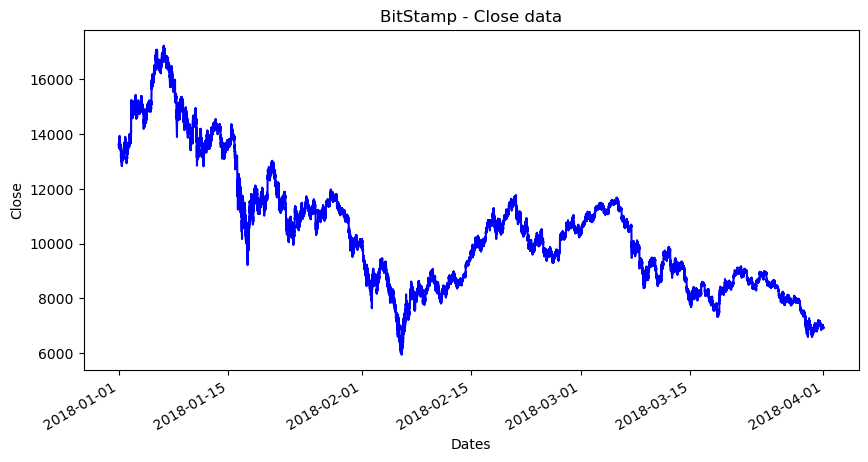

In [76]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,5), xlabel = 'Dates', ylabel = 'Close', title='BitStamp - Close data',color = 'blue')

<AxesSubplot:title={'center':'Coinbase - Close data'}, xlabel='Dates', ylabel='Close'>

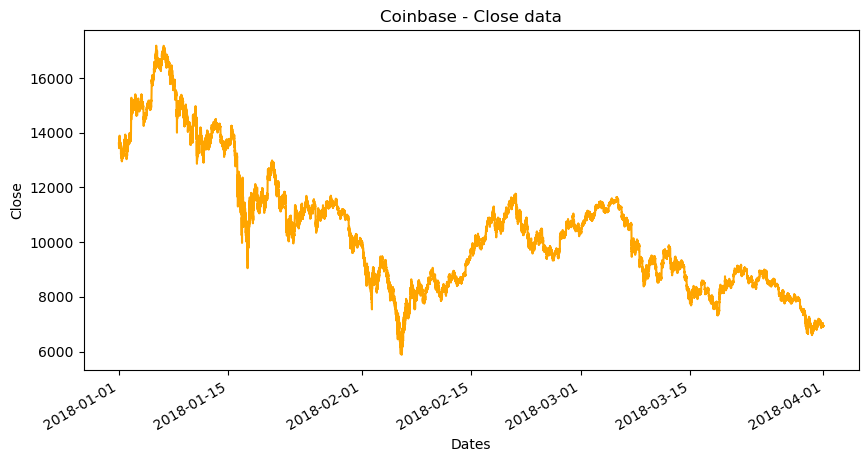

In [77]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10,5),xlabel = 'Dates', ylabel = 'Close', title='Coinbase - Close data',color = 'orange')

<AxesSubplot:title={'center':'BitStamp and Coinbase Overlay Plot - Close data - Q1 2018'}, xlabel='Dates', ylabel='Close'>

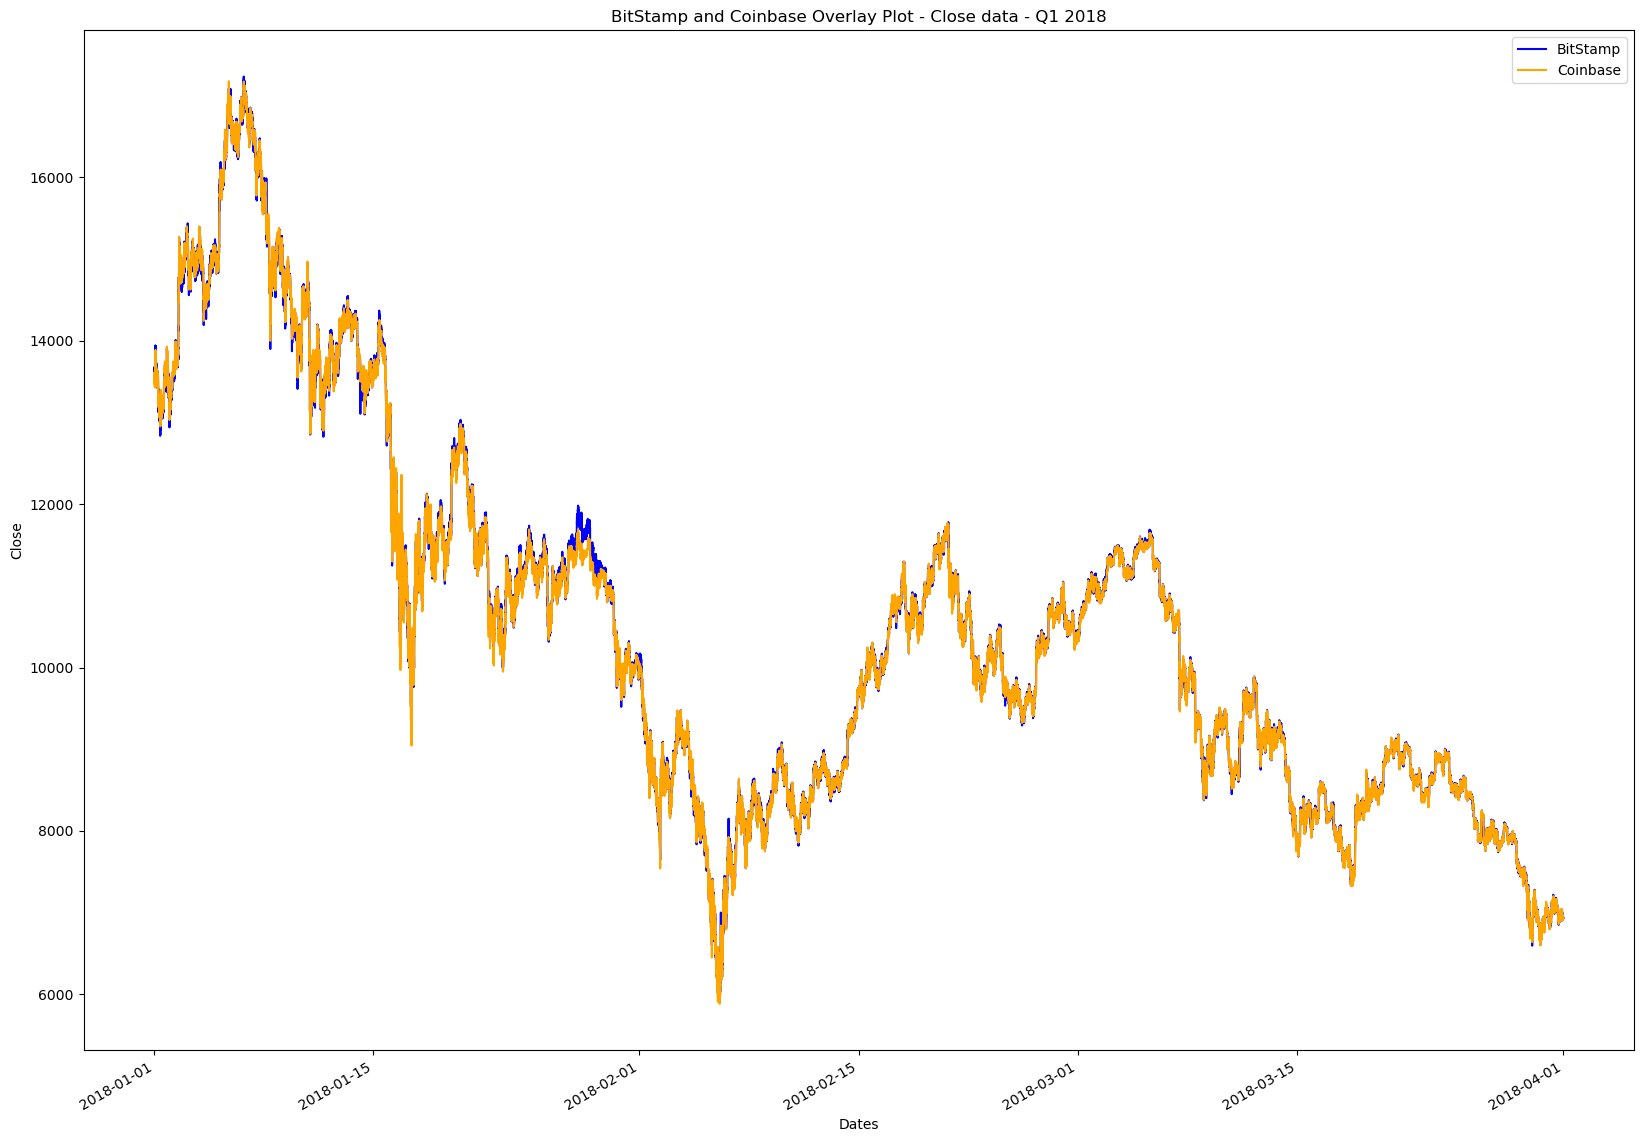

In [102]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Note: The ratio on the figsize parameters are intended to give better visibility to the Close data in the y-axis

bitstamp_sliced.plot(legend=True, figsize=(20, 15), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Q1 2018", 
                     color="blue", label="BitStamp")
coinbase_sliced.plot(legend=True, figsize=(20, 15),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")

<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - Jan '18"}, xlabel='Dates', ylabel='Close'>

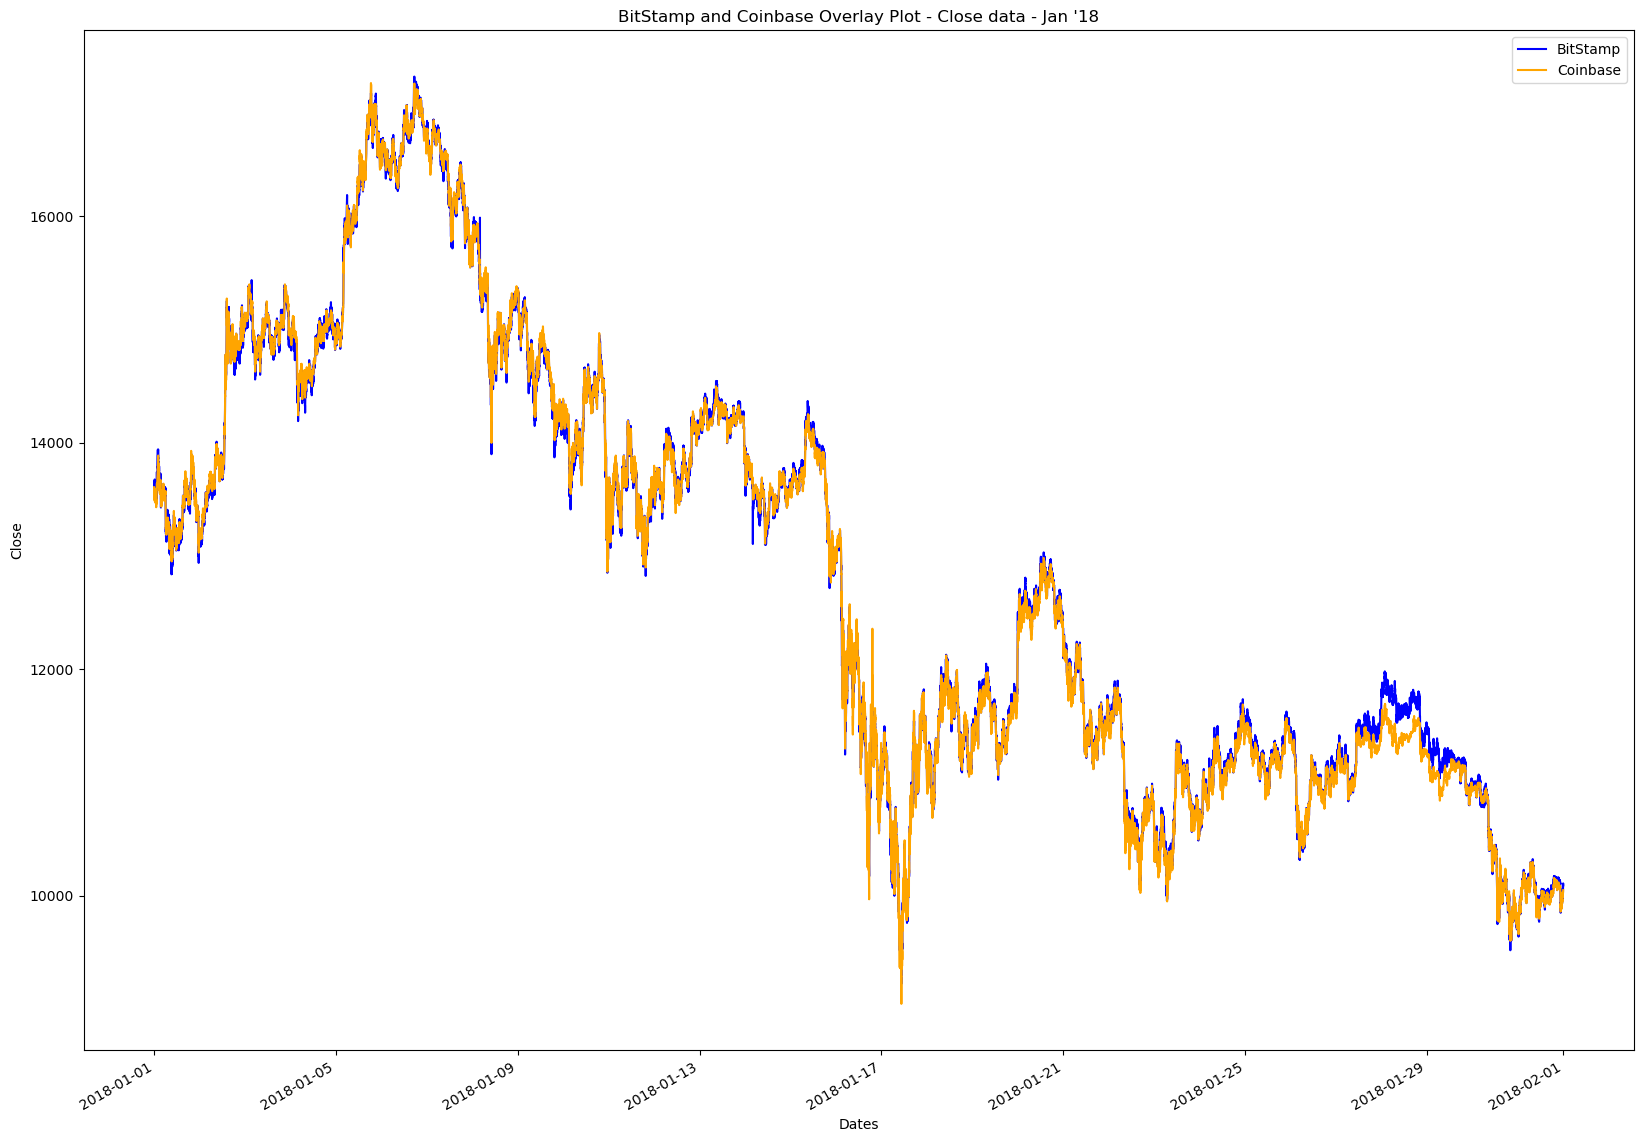

In [122]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(20, 15), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Jan '18", 
                     color="blue", label="BitStamp")
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(20, 15),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")

<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - Mar '18"}, xlabel='Dates', ylabel='Close'>

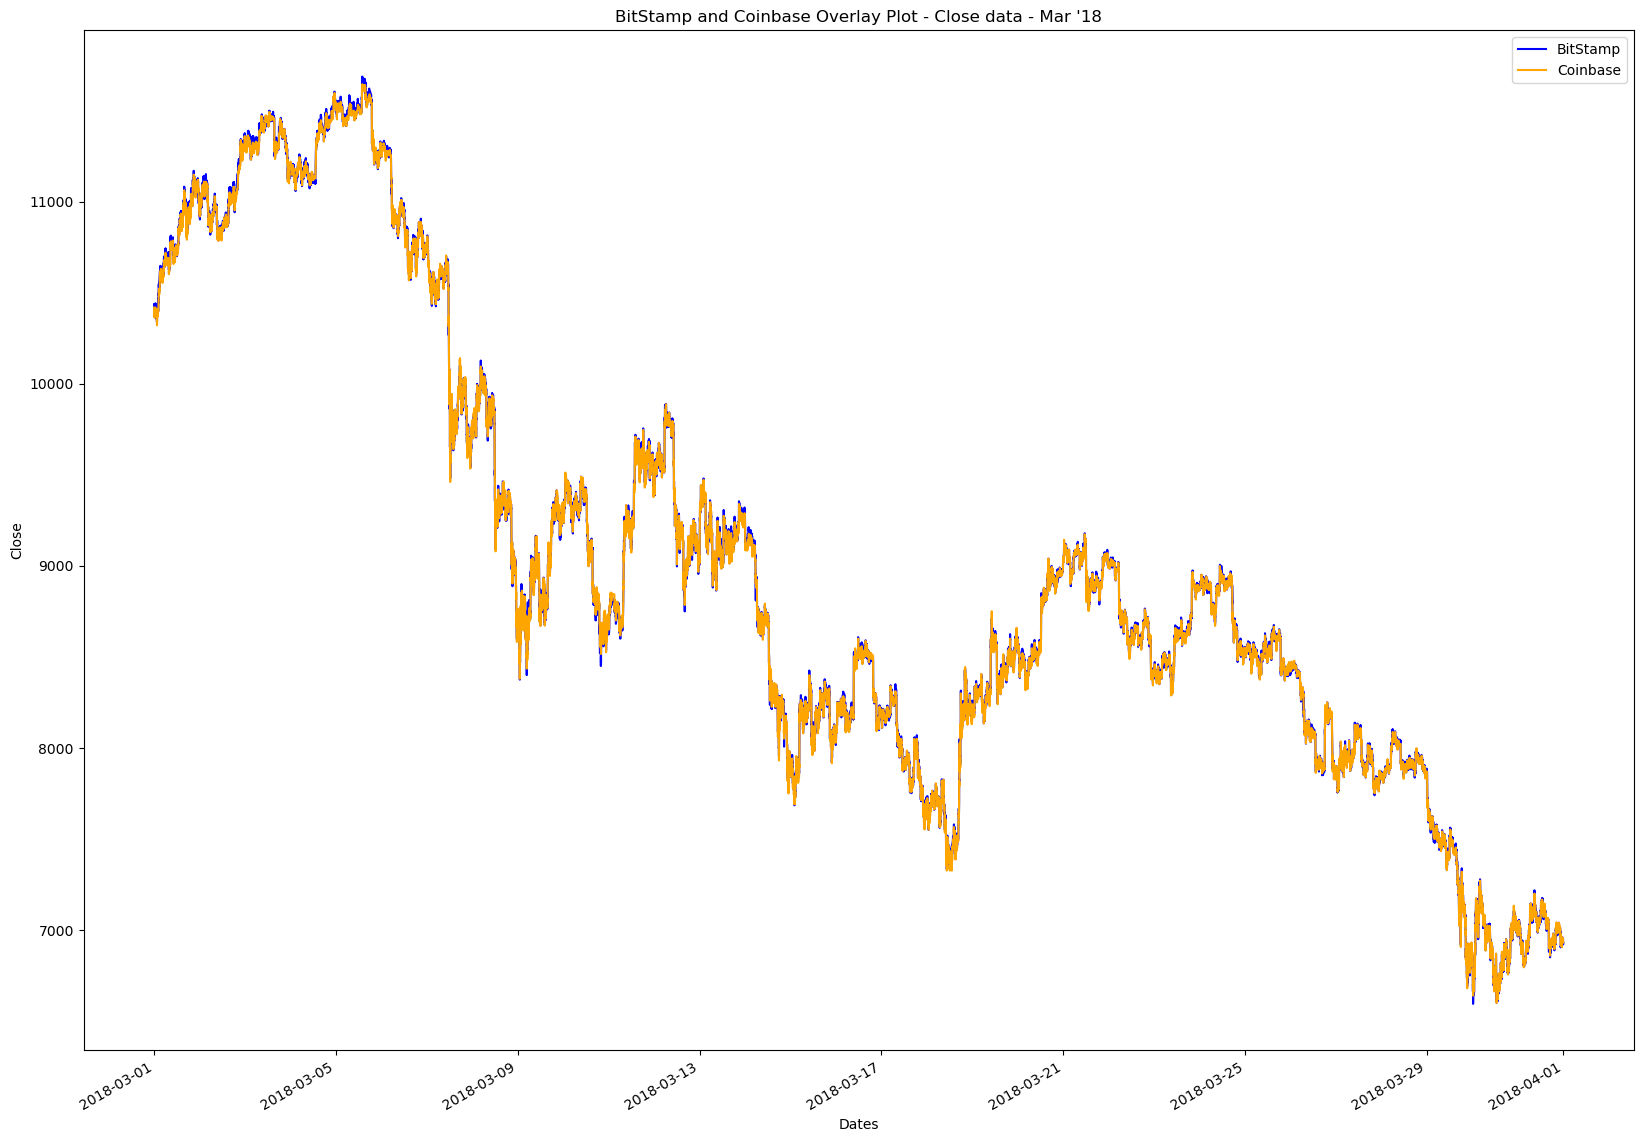

In [123]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(20, 15), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Mar '18", 
                     color="blue", label="BitStamp")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(20, 15),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** There seems to be fewer occurrences as well as smaller spreads past the first month (January '18) in the data set

### Step 3.3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'BitStamp and Coinbase Overlay Plot - Close data - Jan 29  2018'}, xlabel='Dates', ylabel='Close'>

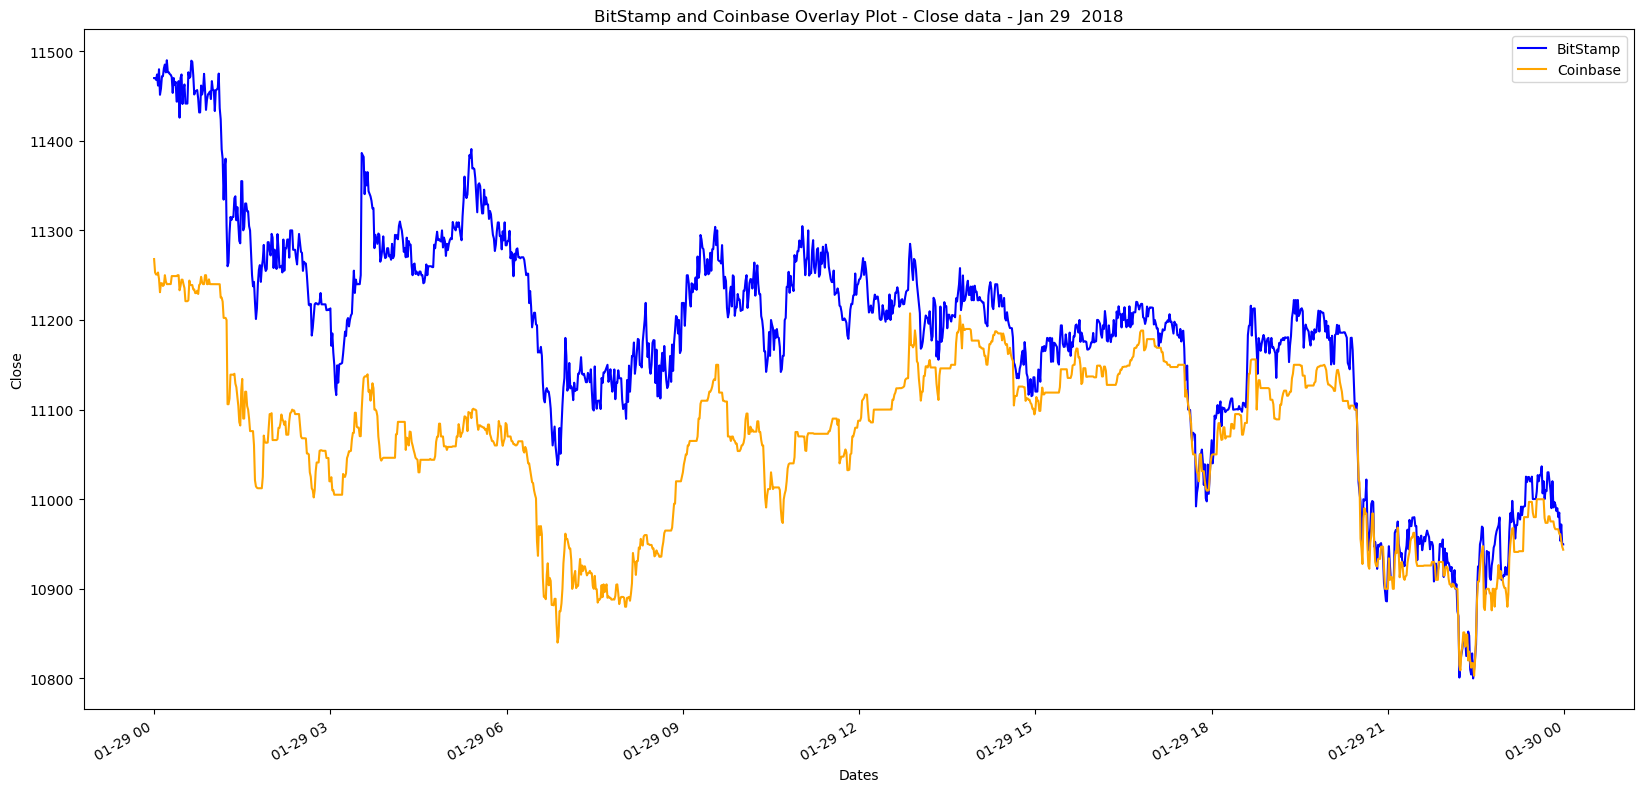

In [124]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced.loc['2018-01-29':'2018-01-29'].plot(legend=True, figsize=(20, 10), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Jan 29  2018", 
                     color="blue", label="BitStamp")
coinbase_sliced.loc['2018-01-29':'2018-01-29'].plot(legend=True, figsize=(20, 10), xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")

In [125]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp_sliced.loc['2018-01-29':'2018-01-29'] - coinbase_sliced.loc['2018-01-29':'2018-01-29']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

arbitrage_spread_early.describe(include = 'all')


count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase/BitStamp Arbitrage Spread - Jan 29 2018'}, ylabel='Spread'>

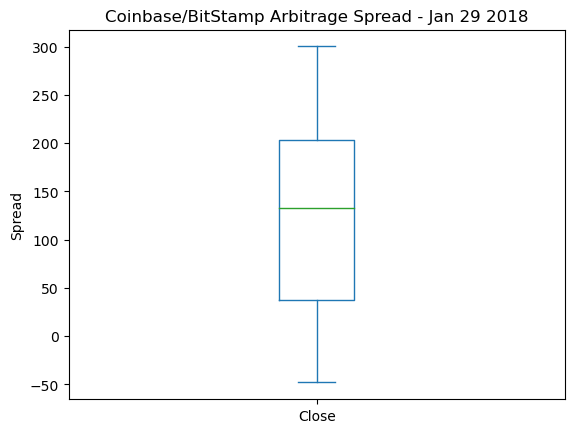

In [126]:
# Visualize the arbitrage spread from early in the dataset in a box plot

arbitrage_spread_early.plot(kind ='box', ylabel = 'Spread', title = 'Coinbase/BitStamp Arbitrage Spread - Jan 29 2018')

<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - Feb '18"}, xlabel='Dates', ylabel='Close'>

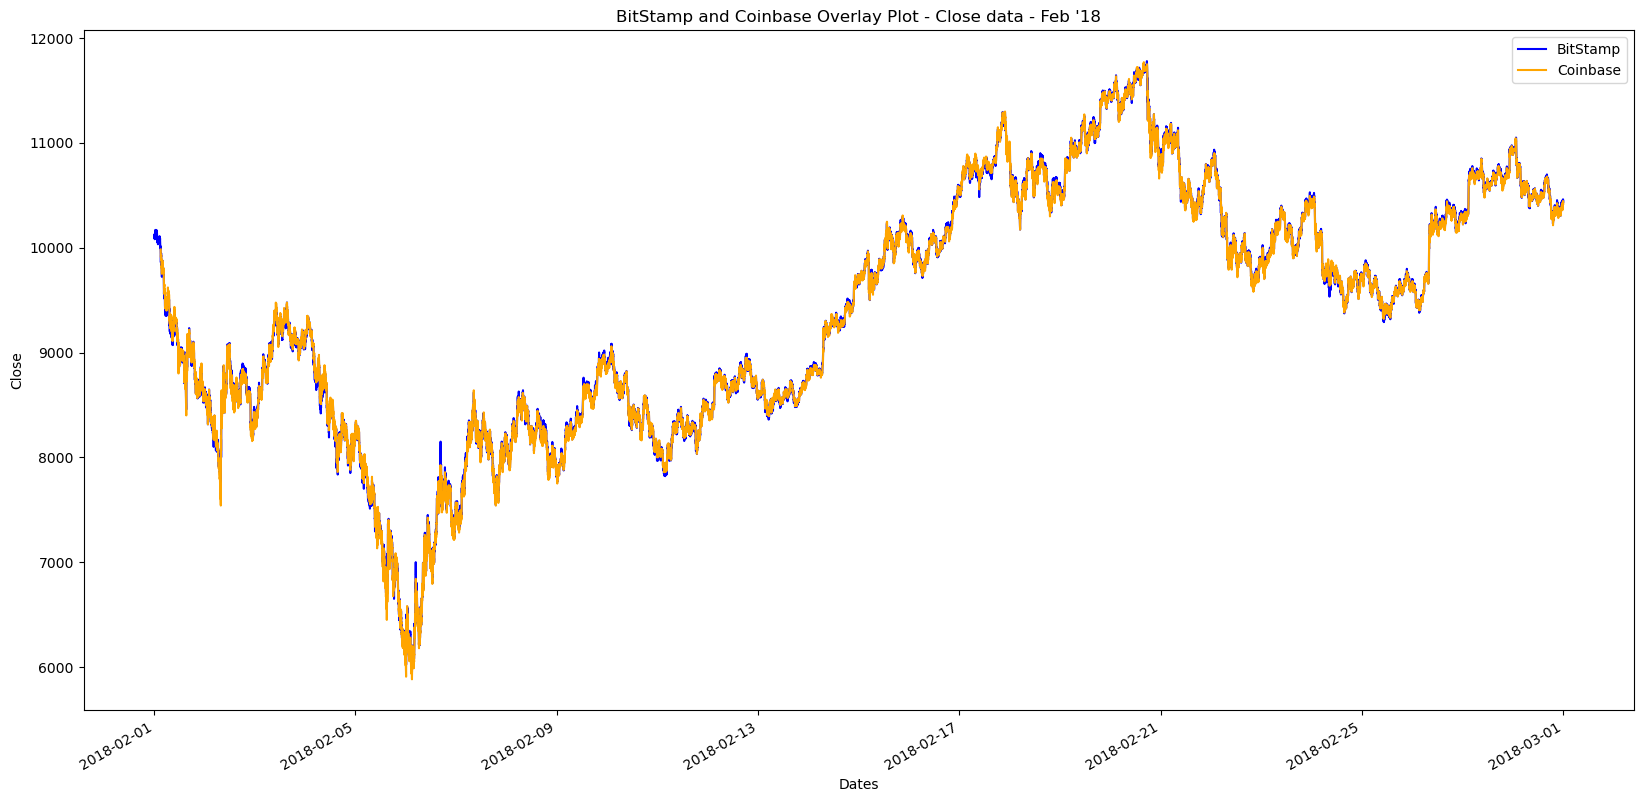

In [127]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label'
# NOTE: Before focusing on a single day, I ran a plot for the month of February to find a target date

bitstamp_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(20, 10), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Feb '18", 
                     color="blue",label="BitStamp")
coinbase_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(20, 10),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")


<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - Feb 11 '18"}, xlabel='Date/Time', ylabel='Close'>

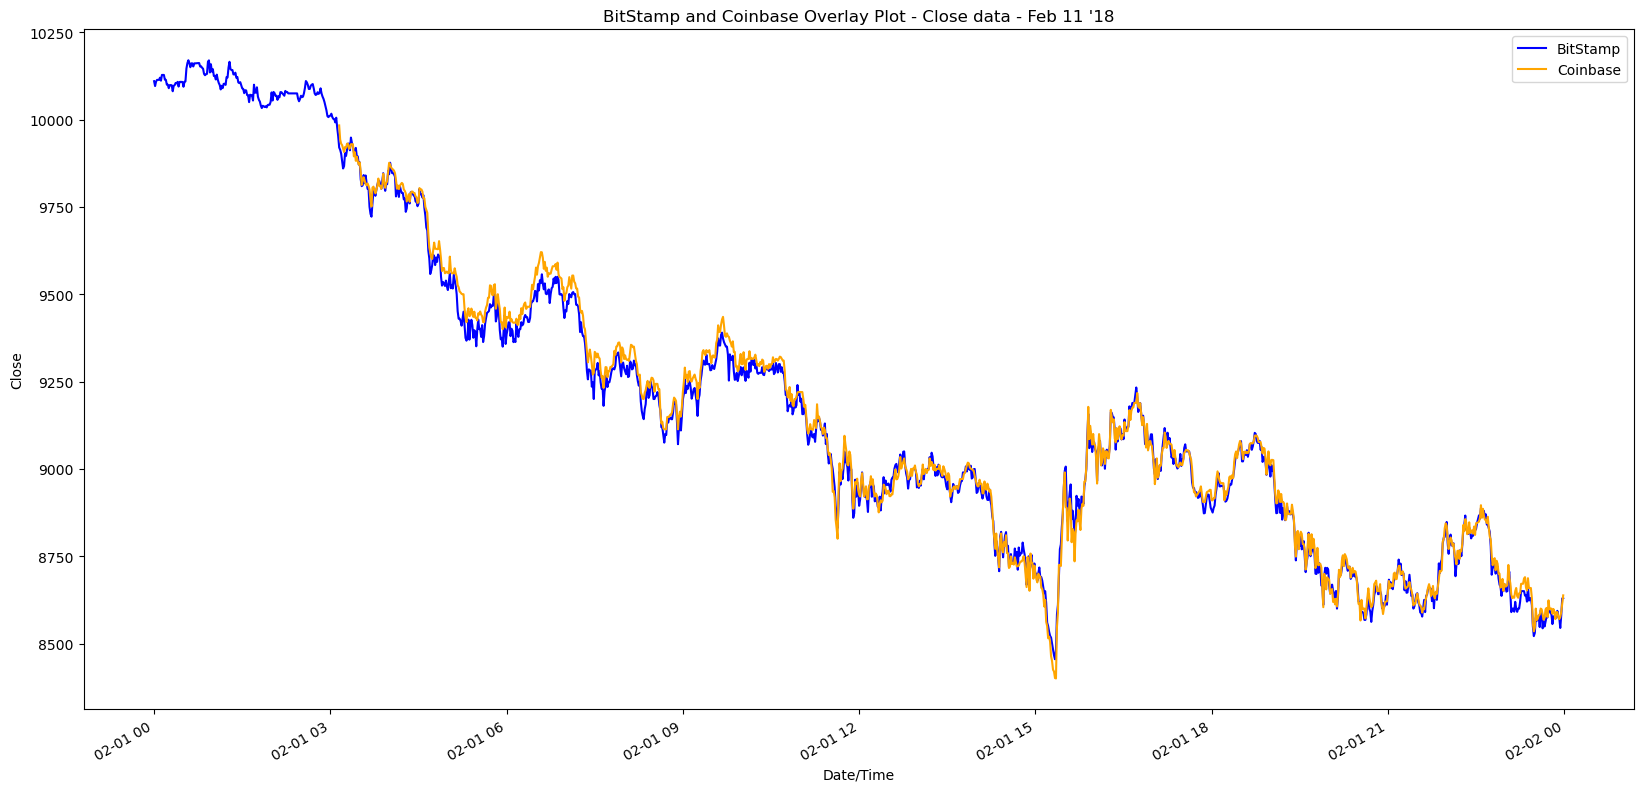

In [199]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# NOTE : From the February plot, it looks like February 1 was a good target date to focus the analysis on

bitstamp_sliced.loc['2018-02-01':'2018-02-01'].plot(legend=True, figsize=(20, 10), xlabel='Date/Time', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Feb 11 '18", 
                     color="blue",label="BitStamp")
coinbase_sliced.loc['2018-02-01':'2018-02-01'].plot(legend=True, figsize=(20, 10),xlabel='Date/Time', ylabel = 'Close',color="orange", label="Coinbase")


In [200]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-01':'2018-02-01'] - bitstamp_sliced.loc['2018-02-01':'2018-02-01']

# Generate summary statistics 
arbitrage_spread_middle.describe(include='all')

count    1251.000000
mean       13.956163
std        25.420642
min      -115.930000
25%        -0.960000
50%        13.860000
75%        30.795000
max       125.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase/BitStamp Arbitrage Spread - Feb 1 2018'}, ylabel='Spread'>

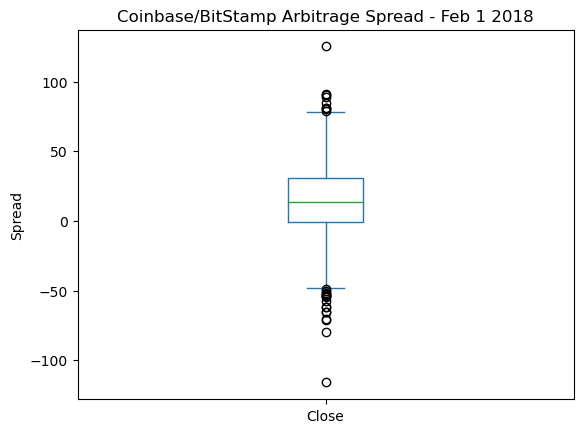

In [201]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot

arbitrage_spread_middle.plot(kind='box', ylabel = 'Spread', title = 'Coinbase/BitStamp Arbitrage Spread - Feb 1 2018')

<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - Mar '18"}, xlabel='Dates', ylabel='Close'>

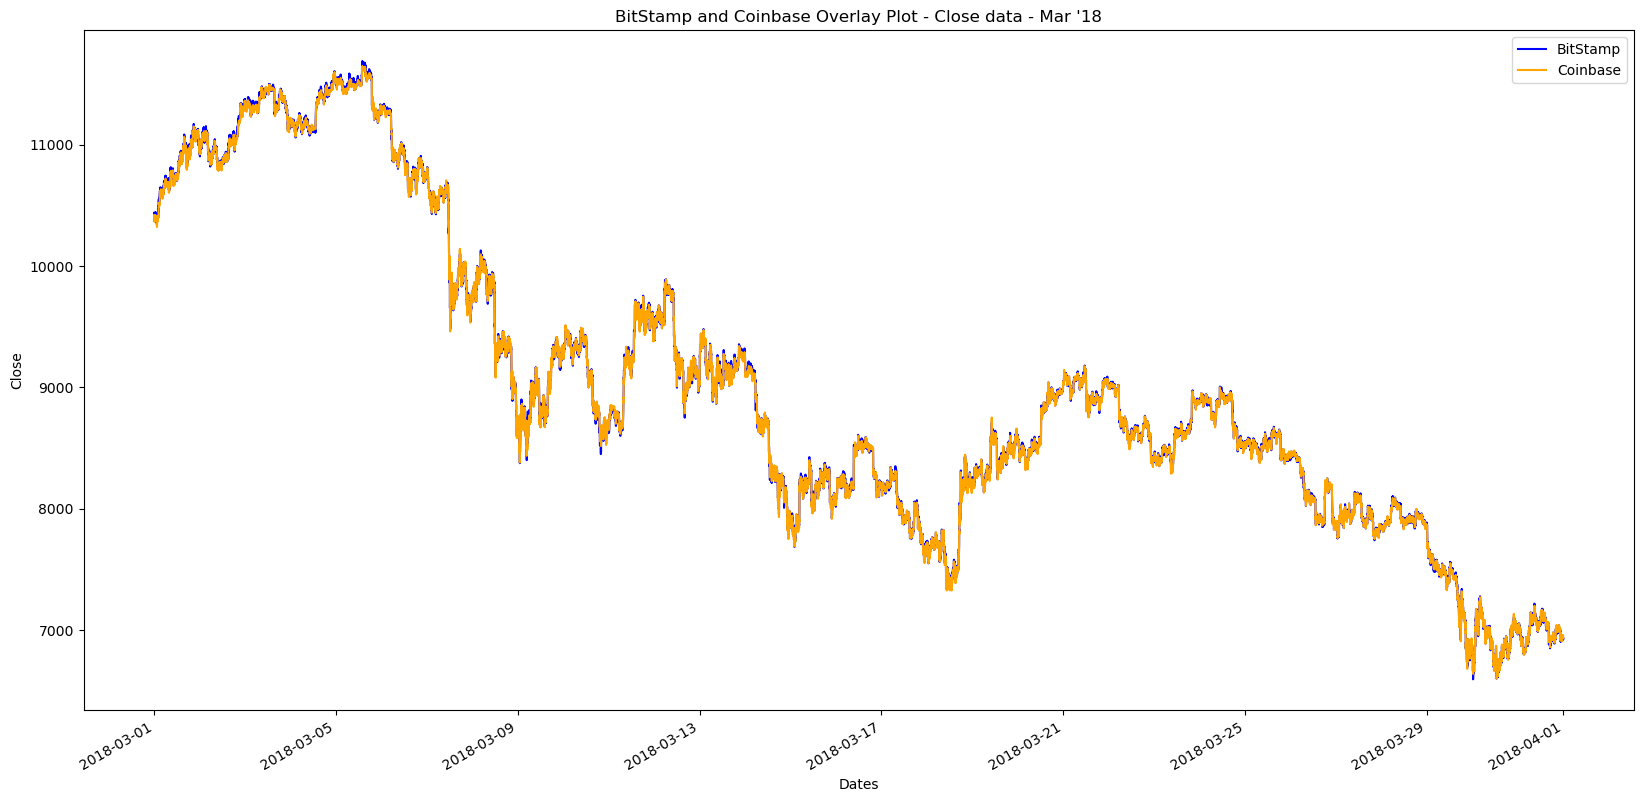

In [132]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
# NOTE: Before selecting a specific day, I ran a plot for the month of March to find a good candidate day to focus on

bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(20, 10), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - Mar '18", 
                     color="blue",label="BitStamp")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(20, 10),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")


<AxesSubplot:title={'center':"BitStamp and Coinbase Overlay Plot - Close data - March 14 '18"}, xlabel='Dates', ylabel='Close'>

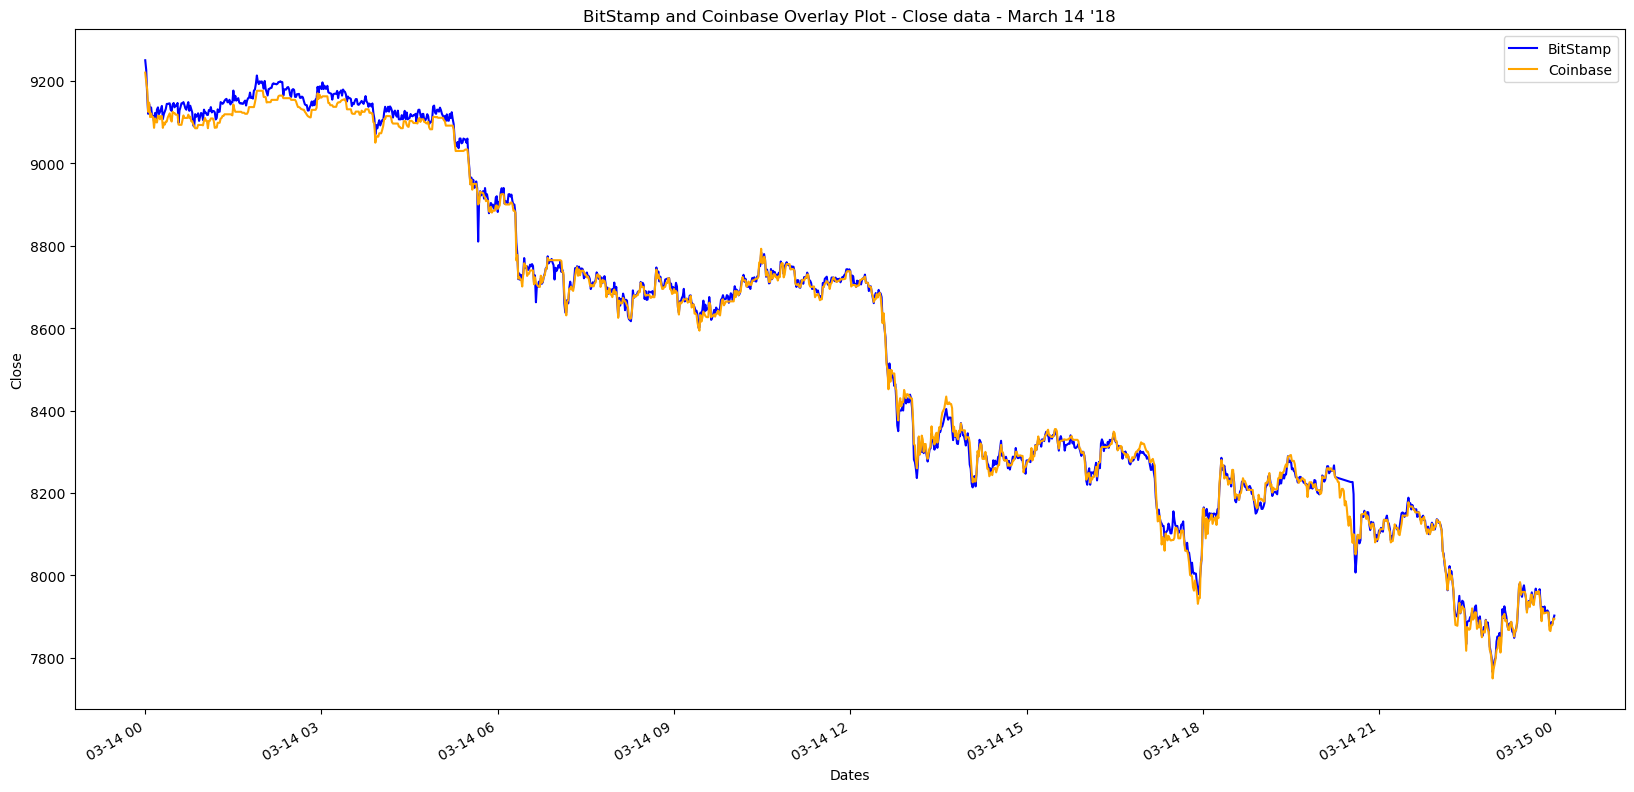

In [133]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label
# NOTE: From the plot above, looked like March 14th was a date with spread occurences so I focused on that day

bitstamp_sliced.loc['2018-03-14':'2018-03-14'].plot(legend=True, figsize=(20, 10), xlabel='Dates', ylabel = 'Close', title="BitStamp and Coinbase Overlay Plot - Close data - March 14 '18", 
                     color="blue",label="BitStamp")
coinbase_sliced.loc['2018-03-14':'2018-03-14'].plot(legend=True, figsize=(20, 10),xlabel='Dates', ylabel = 'Close',color="orange", label="Coinbase")


In [134]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-14':'2018-03-14'] - coinbase_sliced.loc['2018-03-14':'2018-03-14']

# Generate summary statistics 
arbitrage_spread_late.describe(include='all')

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase/BitStamp Arbitrage Spread - Mar 14 2018'}, ylabel='Spread'>

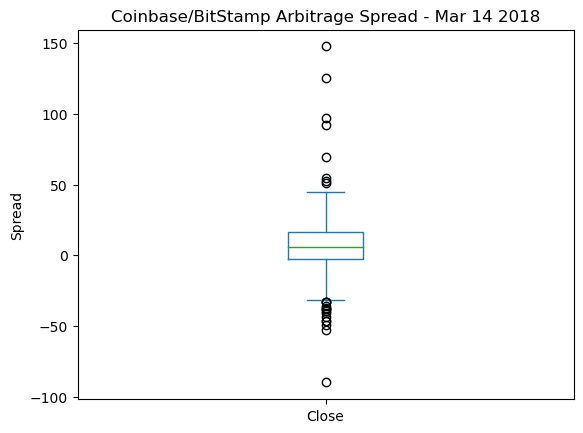

In [135]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', ylabel = 'Spread', title = 'Coinbase/BitStamp Arbitrage Spread - Mar 14 2018')

### Step 3.4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

3.4.1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

3.4.2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3.4.3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

3.4.4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

3.4.5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

3.4.6. Generate the summary statistics, and plot the results for each of the three DataFrames.

3.4.7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

3.4.8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 3.4.1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [136]:
# 3.4.1.1 For the *date early* in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = bitstamp_sliced.loc['2018-01-29'] - coinbase_sliced.loc['2018-01-29']

arbitrage_spread_early.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

In [202]:
# 3.4.1.2 For the *date in the middle* of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle = coinbase_sliced.loc['2018-02-01'] - bitstamp_sliced.loc['2018-02-01']

arbitrage_spread_middle.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    1251.000000
mean       13.956163
std        25.420642
min      -115.930000
25%        -0.960000
50%        13.860000
75%        30.795000
max       125.180000
Name: Close, dtype: float64

In [138]:
# 3.4.1.3 For the *date late* in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late = bitstamp_sliced.loc['2018-03-14'] - coinbase_sliced.loc['2018-03-14']

arbitrage_spread_late.describe()

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

#### 3.4.2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [141]:
# 3.4.2.1 For the *date early* in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange: coinbase).

spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0]/ coinbase_sliced.loc['2018-01-29']

# Review the spread return DataFrame

spread_return_early.describe()

count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

In [203]:
# 3.4.2.2 For the *date in the middle* of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange: coinbase).

spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]/ coinbase_sliced.loc['2018-02-01']

# Review the spread return DataFrame

spread_return_middle.describe()

count    911.000000
mean       0.002736
std        0.001898
min        0.000005
25%        0.001149
50%        0.002423
75%        0.003961
max        0.013348
Name: Close, dtype: float64

In [143]:
# 3.4.2.3 For the *date late* in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange: coinbase).

spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0]/ coinbase_sliced.loc['2018-03-14']

# Review the spread return DataFrame

spread_return_late.describe()

count    956.000000
mean       0.001694
std        0.001446
min        0.000001
25%        0.000686
50%        0.001391
75%        0.002430
max        0.018276
Name: Close, dtype: float64

#### 3.4.3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [145]:
# 3.4.3.1 For the *date early* in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades

profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [204]:
# 3.4.3.2 For the *date in the middle* in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades

profitable_trades_middle.head()

Timestamp
2018-02-01 09:47:00    0.013348
Name: Close, dtype: float64

In [147]:
# 3.4.3.3 For the *date late* in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades

profitable_trades_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 3.4.4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [148]:
# For the *date early* in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_early.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

#### 3.4.5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [150]:
# 3.4.5.1 For the *date early* in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-29']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
                                                             
profit_per_trade_early

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 742, dtype: float64

In [205]:
# 3.4.5.2 For the *date in the middle* of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
                                                             
profit_per_trade_middle

Timestamp
2018-02-01 09:47:00    125.18
Name: Close, dtype: float64

In [206]:
# 3.4.5.3 For the *date late* in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
                                                             
profit_per_trade_late

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 3.4.6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [207]:
# 3.4.6.1 Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    742.000000
mean     196.724070
std       34.604234
min      111.200000
25%      170.037500
50%      200.930000
75%      221.002500
max      300.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BitStamp/Coinbase Arbitrage Profit - Jan 29 2018'}, xlabel='Timestamp', ylabel='Profit'>

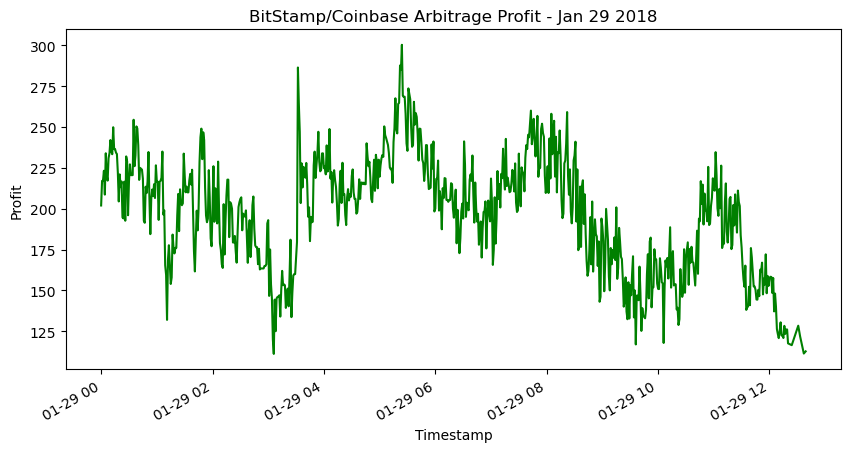

In [208]:
# 3.4.6.1 Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 5), ylabel = 'Profit', title="BitStamp/Coinbase Arbitrage Profit - Jan 29 2018", 
                     color="green")

In [209]:
# 3.4.6.2 Generate the summary statistics for the middle date profit per trade DataFrame
profit_per_trade_middle.describe()

count      1.00
mean     125.18
std         NaN
min      125.18
25%      125.18
50%      125.18
75%      125.18
max      125.18
Name: Close, dtype: float64

In [211]:
# 3.4.6.2 Plot the results for the middle date profit per trade DataFrame
# Note: Since there was only 1 profitable trade, the graph is omitted for this period
# profit_per_trade_middle.plot(figsize=(5, 5), xlabel = 'Timestamp', ylabel = 'Profit', title="BitStamp/Coinbase Arbitrage Profit - Feb 1 2018", 
                     # color="cyan")

In [212]:
# 3.4.6.2 Generate the summary statistics for the late date profit per trade DataFrame
profit_per_trade_late.describe()

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BitStamp/Coinbase Arbitrage Profit - Mar 14 2018'}, xlabel='Timestamp', ylabel='Profit'>

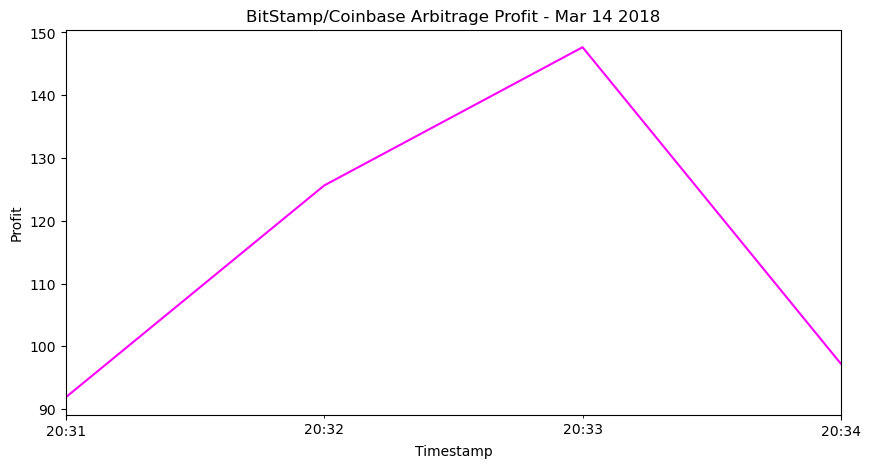

In [224]:
# 3.4.6.3 Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 5), ylabel = 'Profit', title="BitStamp/Coinbase Arbitrage Profit - Mar 14 2018", 
                     color="magenta")

#### 3.4.7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [214]:
# 3.4.7.1 Calculate the sum of the potential profits for the early profit per trade DataFrame

early_profits = profit_per_trade_early.sum()
early_profits

145969.25999999995

In [215]:
# 3.4.7.2 Calculate the sum of the potential profits for the middle date profit per trade DataFrame

middle_profits = profit_per_trade_middle.sum()
middle_profits

125.18000000000029

In [216]:
# 3.4.7.3 Calculate the sum of the potential profits for the late profit per trade DataFrame

late_profits = profit_per_trade_late.sum()
late_profits

462.3899999999976

#### 3.4.8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [222]:
# 3.4.8.1 Use the cumsum function to calculate the cumulative profits over time for the early profit DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-29 00:00:00       201.98
2018-01-29 00:01:00       418.98
2018-01-29 00:02:00       636.20
2018-01-29 00:03:00       859.42
2018-01-29 00:04:00      1068.06
                         ...    
2018-01-29 12:24:00    145494.72
2018-01-29 12:31:00    145623.16
2018-01-29 12:33:00    145745.09
2018-01-29 12:37:00    145856.51
2018-01-29 12:39:00    145969.26
Name: Close, Length: 742, dtype: float64

In [225]:
# 3.4.8.3 Use the cumsum function to calculate the cumulative profits over time for the late profit Data Frame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    217.52
2018-03-14 20:33:00    365.17
2018-03-14 20:34:00    462.39
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BitStamp/Coinbase Arbitrage Early Cumulative Profit - Jan 29 2018'}, xlabel='Timestamp', ylabel='Cumulative Profit'>

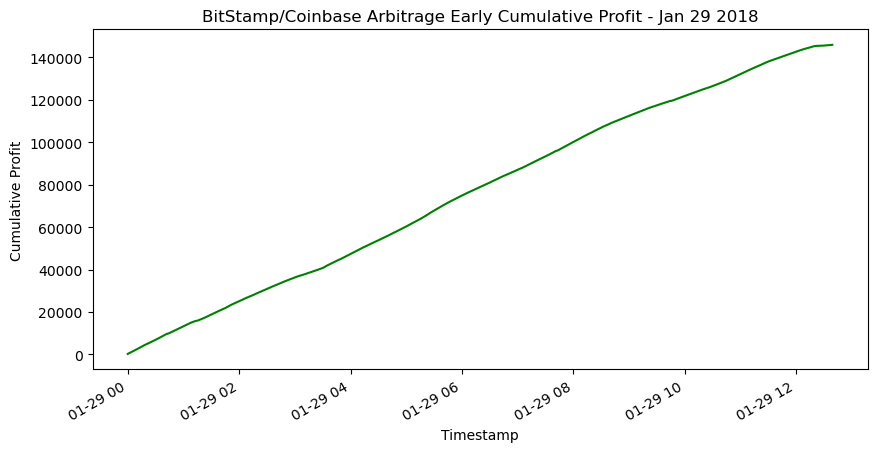

In [219]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 5), ylabel = 'Cumulative Profit', title="BitStamp/Coinbase Arbitrage Early Cumulative Profit - Jan 29 2018", 
                     color="green")

In [223]:
# 3.4.8.2 Use the cumsum function to calculate the cumulative profits over time for the middle profit Data Frame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-02-01 09:47:00    125.18
Name: Close, dtype: float64

In [227]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Note: Since there was only one profitable trade in the period, the graph is omitted

# cumulative_profit_middle.plot(figsize=(10, 5), ylabel = 'Cumulative Profit', title="BitStamp/Coinbase Arbitrage Mid Cumulative Profit - Feb 1 2018", 
#                      color="cyan")

In [228]:
# 3.4.8.3 Use the cumsum function to calculate the cumulative profits over time for the late profit Data Frame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    217.52
2018-03-14 20:33:00    365.17
2018-03-14 20:34:00    462.39
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BitStamp/Coinbase Arbitrage Late Cumulative Profit - Mar 14 2018'}, xlabel='Timestamp', ylabel='Cumulative Profit'>

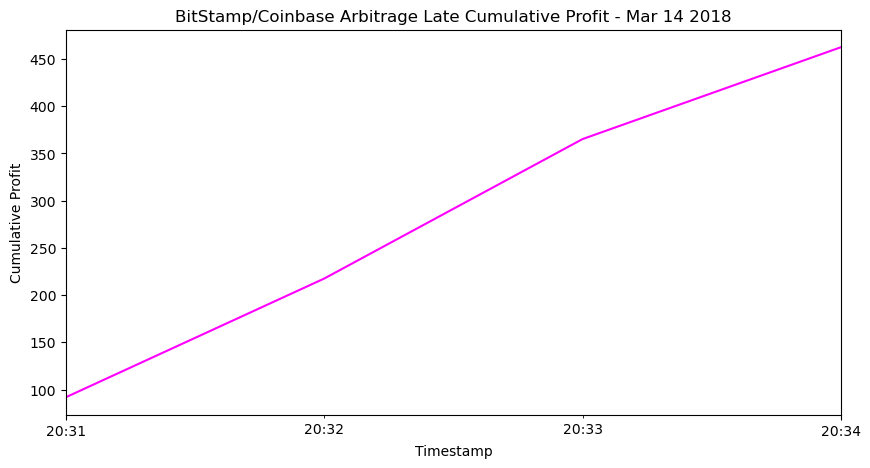

In [229]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 5), ylabel = 'Cumulative Profit', title="BitStamp/Coinbase Arbitrage Late Cumulative Profit - Mar 14 2018", 
                     color="magenta")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There were profitable arbitrage opportunities early in Q1 '18, during January, as shown in sections 3.2 and 3.3. In February most of the arbitrage opportunities were not profitabe (below the 1% threshold) and while in late in Q1 there were some opportunities again, there were not as many qualified for profit compared to the begining of Q1 2018, as shown in section 3.4.